# Plot Spectra

This example demonstrates how to extract a spectra directly from a grid and plots all the available spectra.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmasher as cmr
import os
from unyt import Angstrom
from synthesizer.grid import Grid, get_available_lines

Let's begin by defining the the grid and its location:

In [2]:

grid_dir =  '../../../tests/test_grid/'
grid_name = 'test_grid'

We can then initialise the grid:

In [3]:
grid = Grid(grid_name, grid_dir=grid_dir)

Next, let's define a target log10age and metallicity and use the built-in method to get the grid point:

In [4]:
log10age = 6. # log10(age/yr)
metallicity = 0.01 
grid_point = grid.get_grid_point((log10age, metallicity))
print(grid_point)

(0, 8)


Now, let's loop over the spectra available and add them to the plot, along with some labels and choosing more sensible ranges:

/Users/sw376/.local/lib/python3.11/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


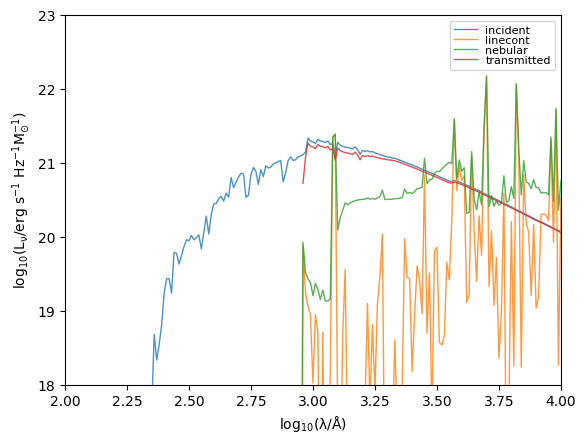

In [5]:
for spec_name in grid.spec_names:
    sed = grid.get_sed(grid_point, spec_name=spec_name)
    plt.plot(np.log10(sed.lam), np.log10(sed.lnu), lw=1, alpha=0.8, label=spec_name)

plt.xlim([2., 4.])
plt.ylim([18., 23])
plt.legend(fontsize=8, labelspacing=0.0)
plt.xlabel(r'$\rm log_{10}(\lambda/\AA)$')
plt.ylabel(r'$\rm log_{10}(L_{\nu}/erg\ s^{-1}\ Hz^{-1} M_{\odot}^{-1})$')
plt.show()